In [19]:
!wget -O pred_data.zip https://www.dropbox.com/s/94k5ip6147r61vr/pred_data.zip?dl=0

--2022-06-25 16:54:29--  https://www.dropbox.com/s/94k5ip6147r61vr/pred_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/94k5ip6147r61vr/pred_data.zip [following]
--2022-06-25 16:54:30--  https://www.dropbox.com/s/raw/94k5ip6147r61vr/pred_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb670058992f6b9dd76b2125981.dl.dropboxusercontent.com/cd/0/inline/Bn4XVHM1EtEqAjtq5aWfcFgtoTlPJ9WQYBFXuk0rY9Kcl0yAa-tiJaifIRTmtjWUy0o9lv7xKMFewLFTEWkynTFqOZyN0m0pkcpomOuQDyxBtC1f6_t-dQW7t0izF6quZeolDu31mS_lAbUAVI3UoUsUb6RfSgDizihZYLW-pa_0bw/file# [following]
--2022-06-25 16:54:30--  https://ucb670058992f6b9dd76b2125981.dl.dropboxusercontent.com/cd/0/inline/Bn4XVHM1EtEqAjtq5aWfcFgtoTlPJ9WQYBFXuk0rY9Kcl0yAa-tiJaifI

In [20]:
!unzip pred_data.zip

Archive:  pred_data.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               
  inflating: img/106A2785_s.jpg.jpg  
  inflating: img/106A2793_s.jpg.jpg  
  inflating: img/106A2797_s.jpg.jpg  
  inflating: img/106A2816_s.jpg.jpg  
  inflating: img/106A2833_s.jpg.jpg  
  inflating: img/106A2883_s.jpg.jpg  
  inflating: img/106A2890_s.jpg.jpg  
  inflating: img/106A2898_s.jpg.jpg  
  inflating: img/106A2918_s.jpg.jpg  
  inflating: img/106A2996_s.jpg.jpg  
  inflating: img/106A3016_s.jpg.jpg  
  inflating: img/106A3169_s.jpg.jpg  
  inflating: img/106A3172_s.jpg.jpg  
  inflating: img/106A3177_s.jpg.jpg  
  inflating: img/106A3183_s.jpg.jpg  
  inflating: img/106A3195_s.jpg.jpg  
  inflating: img/106A3198_s.jpg.jpg  
  inflating: img/106A3200_s.jpg.jpg  
  inflating: img/106A3206_s.jpg.jpg  
  inflating: img/106A3268_s.jpg.jpg  
  inflating: img/13A_6668.jpg.jpg    
  inflating: img/13A_6670.jpg.jpg    
  infl

In [21]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Normalization, GlobalAvgPool2D
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomCrop, CenterCrop, RandomZoom, RandomContrast
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 
from PIL import Image

In [22]:
w = 150
h = 150

In [23]:
def pred(img):
    i = Image.open(img)
    i = i.resize((w, h), Image.ANTIALIAS)
    return np.array(i)/255

In [24]:
train = pd.read_csv('train.csv')
train

,Названия,Авиа,Автомобили,БПЛА,Водолаз,Кинолог,Кони,Объятия,Шерп,День,Ночь,Рассвет/закат,Зима,Весна,Лето,Осень,Лес,Город
0,img/A_Oshepkov-3191.jpg.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,img/IMG_2427.jpg.jpg,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,img/DSCN8095.JPG.jpg,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,img/DSC_0106.jpg.jpg,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,img/photo_2022-02-15 20.51.13.jpeg.jpg,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,img/A_Oshepkov-3600.jpg.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
950,img/A_Oshepkov-2866.jpg.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
951,img/DJI_0765.JPG.jpg,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
952,img/DSC08234.jpg.jpg,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
data_augmentation = Sequential()
data_augmentation.add(RandomFlip("vertical"))
data_augmentation.add(RandomRotation(0.2))
data_augmentation.add(RandomZoom(0.3))
data_augmentation.add(RandomCrop(150, 150))

In [26]:
x_train = train["Названия"].apply(pred)
x_train = np.array([np.array(val,dtype=np.float32) for val in x_train])
# x_train=tf.keras.applications.resnet50.preprocess_input(x_train)


In [27]:
y_train = train.iloc[:,1:]
# y_train = keras.utils.to_categorical(y_train, y_train.shape[1])
y_train


,Авиа,Автомобили,БПЛА,Водолаз,Кинолог,Кони,Объятия,Шерп,День,Ночь,Рассвет/закат,Зима,Весна,Лето,Осень,Лес,Город
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
950,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
951,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
952,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [28]:
count_klass = y_train.shape[1]

In [29]:
# vgg16_net = VGG16(weights='imagenet', 
#                   include_top=False, 
#                   input_shape=(128, 128, 3))

In [30]:
# for layer in vgg16_net.layers:
#     layer.trainable = False

In [31]:
model = Sequential()
model.add(Normalization(input_shape=(150,150,3)))
model.add(data_augmentation)

model.add(Xception(include_top=False, weights='imagenet', input_shape=(150,150, 3), pooling='avg'))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(count_klass, activation='sigmoid'))

83697664/83683744 [==============================] - 3s 0us/step


In [32]:

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['binary_accuracy'])

In [33]:
ch_p=ModelCheckpoint('best_model.h5', 
                    monitor='val_binary_accuracy', 
                    verbose=1, 
                    save_best_only=True,
                    )

In [34]:
e_s=EarlyStopping(monitor='val_binary_accuracy', 
                      patience=10, 
                      verbose=1
                      )


In [35]:
model.fit(x_train, y_train,
          validation_split=0.2, 
          epochs=100, 
          batch_size=16,
          callbacks=[ch_p,e_s],
          verbose=1)

Epoch 1/100
48/48 [==============================] - ETA: 0s - loss: 0.3697 - binary_accuracy: 0.8594
Epoch 1: val_binary_accuracy improved from -inf to 0.87712, saving model to best_model.h5
48/48 [==============================] - 18s 244ms/step - loss: 0.3697 - binary_accuracy: 0.8594 - val_loss: 0.7697 - val_binary_accuracy: 0.8771
Epoch 2/100
48/48 [==============================] - ETA: 0s - loss: 0.2857 - binary_accuracy: 0.8935
Epoch 2: val_binary_accuracy improved from 0.87712 to 0.88574, saving model to best_model.h5
48/48 [==============================] - 8s 178ms/step - loss: 0.2857 - binary_accuracy: 0.8935 - val_loss: 0.2958 - val_binary_accuracy: 0.8857
Epoch 3/100
48/48 [==============================] - ETA: 0s - loss: 0.2623 - binary_accuracy: 0.8962
Epoch 3: val_binary_accuracy improved from 0.88574 to 0.88605, saving model to best_model.h5
48/48 [==============================] - 9s 178ms/step - loss: 0.2623 - binary_accuracy: 0.8962 - val_loss: 0.3145 - val_binary

In [36]:
test = pd.read_csv('test.csv')
test

,Названия,Авиа,Автомобили,БПЛА,Водолаз,Кинолог,Кони,Объятия,Шерп,День,Ночь,Рассвет/закат,Зима,Весна,Лето,Осень,Лес,Город
0,img/20220522_042858.jpg.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,img/DSC08197.jpg.jpg,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,img/DSC_4195.jpg.jpg,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3,img/A_Oshepkov-2595.jpg.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,img/DJI_0260.JPG.jpg,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,img/DSCN8081.JPG.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
234,img/photo_314@03-10-2019_00-08-25.jpg.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
235,img/photo_2019-09-30_01-30-16.jpg.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
236,img/IMG_0217.jpg.jpg,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [37]:
x_test = test["Названия"].apply(pred)
x_test = np.array([np.array(val,dtype=np.float32) for val in x_test])
# x_train=tf.keras.applications.resnet50.preprocess_input(x_train)


In [38]:
y_test = test.iloc[:,1:]
# y_train = keras.utils.to_categorical(y_train, y_train.shape[1])
y_test


,Авиа,Автомобили,БПЛА,Водолаз,Кинолог,Кони,Объятия,Шерп,День,Ночь,Рассвет/закат,Зима,Весна,Лето,Осень,Лес,Город
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
234,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
235,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
236,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [39]:
model.load_weights("best_model.h5")

In [40]:

predictions = model.predict(x_test)


In [41]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 61ms/step - loss: 0.1543 - binary_accuracy: 0.9570


[0.15427902340888977, 0.9569945931434631]

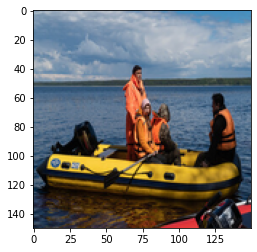

[0, 0, 0, 1.0, 0, 0, 0, 0, 0.99999845, 0, 0, 0, 0, 0, 0, 0, 0]
Авиа             0
Автомобили       0
БПЛА             0
Водолаз          0
Кинолог          0
Кони             1
Объятия          0
Шерп             0
День             1
Ночь             0
Рассвет/закат    0
Зима             0
Весна            0
Лето             1
Осень            0
Лес              1
Город            0
Name: 78, dtype: int64


In [45]:

n = 78
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

arr =[]
for i in predictions[n]:
    if i >= 0.5:
      arr.append(i)
    else:
      arr.append(0)
print(arr)
print(y_train.iloc[n])
